In [1]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"dataset1\train",
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 2699 files belonging to 4 classes.


In [3]:
class_names = dataset.class_names
class_names

['Chickenpox', 'Healthy skin', 'Measles', 'Monkeypox']

In [4]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[2 1 3 1 3 1 3 3 3 3 1 3 2 3 0 2 3 3 3 3 3 1 1 3 3 3 1 3 1 1 2 3]


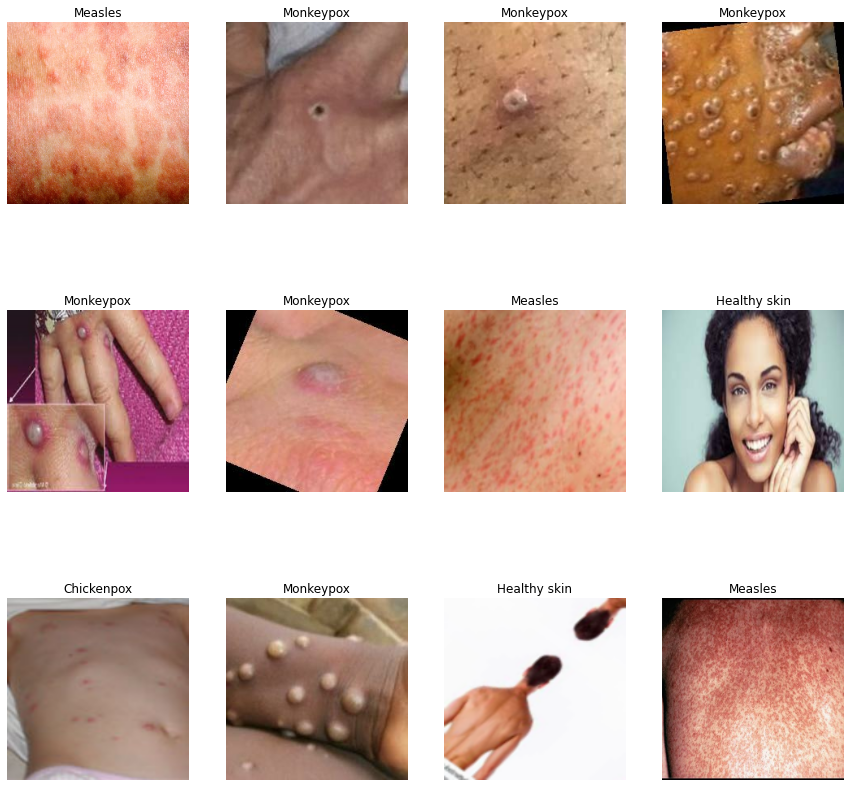

In [5]:
plt.figure(figsize=(15, 15
                   ))
for image_batch, labels_batch in dataset.take(5):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [7]:
train_path =  r"dataset1\train"
valid_path =   r"dataset1\val"

In [8]:
# add preprocessing layer to the front of VGG
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
# don't train existing weights
for layer in densenet.layers:
    layer.trainable = False

In [10]:
# our layers - you can add more if you want
x = Flatten()(densenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

In [11]:
# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
    
)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.2,
                                   rotation_range=10,
                                   horizontal_flip = True)

training_generator = training_datagen.flow_from_directory(  r"dataset1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')



Found 2699 images belonging to 4 classes.


In [15]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range = 0.3,
        zoom_range = 0.2,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
        r'dataset1/val',
        target_size=(224,224),
        batch_size=32,
        class_mode="binary"
)

Found 335 images belonging to 4 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory( r"dataset1\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 340 images belonging to 4 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_generator,
  validation_data=validation_generator,
  epochs=50,
  steps_per_epoch=len(training_generator),
  validation_steps=len(validation_generator),
  verbose=1
)

Epoch 1/50
85/85 [==============================] - 125s 1s/step - loss: 1.1411 - accuracy: 0.8666 - val_loss: 0.2178 - val_accuracy: 0.9552
Epoch 2/50
85/85 [==============================] - 119s 1s/step - loss: 0.2635 - accuracy: 0.9548 - val_loss: 0.5180 - val_accuracy: 0.9075
Epoch 3/50
85/85 [==============================] - 120s 1s/step - loss: 0.2319 - accuracy: 0.9618 - val_loss: 0.2475 - val_accuracy: 0.9612
Epoch 4/50
85/85 [==============================] - 119s 1s/step - loss: 0.1879 - accuracy: 0.9674 - val_loss: 0.5767 - val_accuracy: 0.9254
Epoch 5/50
85/85 [==============================] - 127s 1s/step - loss: 0.1767 - accuracy: 0.9700 - val_loss: 0.3094 - val_accuracy: 0.9552
Epoch 6/50
85/85 [==============================] - 125s 1s/step - loss: 0.1195 - accuracy: 0.9796 - val_loss: 0.5679 - val_accuracy: 0.9582
Epoch 7/50
85/85 [==============================] - 125s 1s/step - loss: 0.1318 - accuracy: 0.9770 - val_loss: 0.3370 - val_accuracy: 0.9552
Epoch 8/50
85

In [18]:
scores = model.evaluate(test_set)

11/11 [==============================] - 16s 1s/step - loss: 0.7110 - accuracy: 0.9735


In [19]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

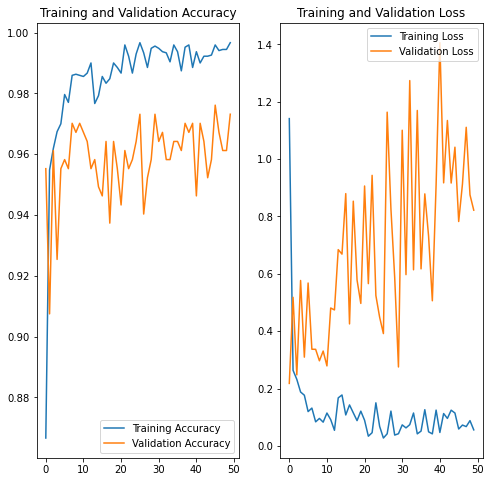

In [21]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 233ms/step


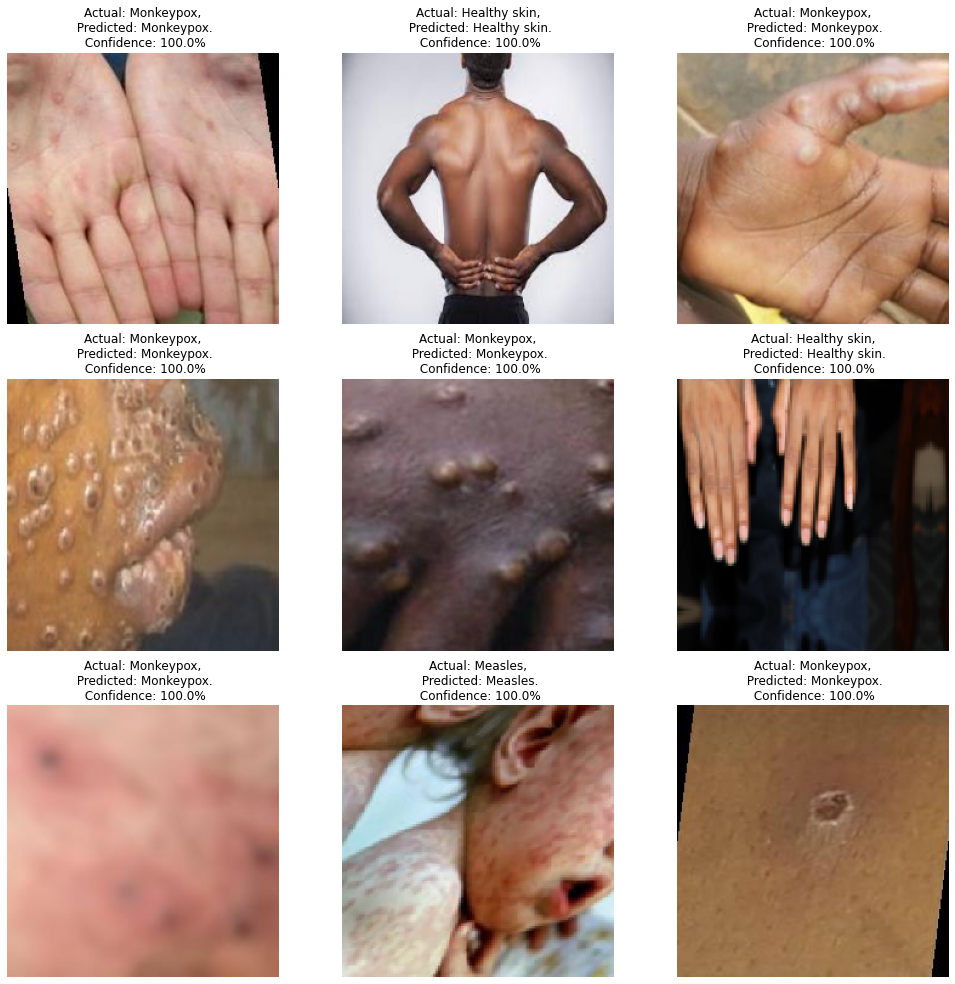

In [24]:
plt.figure(figsize=(17, 17))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break